# Victor Hugo Avila Felipe - A01794425

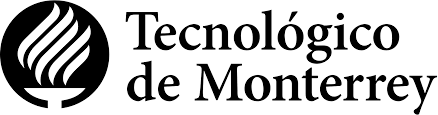

# Data Analysis with Python
## IBM: DA0101EN


LEARNING OBJECTIVES

In this course you will learn about:

    Data Acquisition
    How to Obtain Basic Insight From a Dataset
    Data Wrangling
    Exploratory Data Analysis
    Model Development
    Model Evaluation

## Introduction to Data Analysis with Python

- Problem requiring data analysis
- dataset to analyze in python
- overview of packages
- import and export data
- Basic insights

Can we estimate the price of used cars?

### The problem

why data analysis? 
data everywhere, helps discovery of information.

Tom wants to sell his car, but wants the best price.
what affects the price?

### Understand the data

There are documentation and the .csv file.

The first attribute, "symboling", corresponds to the insurance risk level of a car.
Cars are initially assigned a risk factor symbol associated with their price.
Then, if an automobile is more risky, this symbol is adjusted by moving it up the scale.
A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
The second attribute "normalized-losses" is the relative average loss payment per insured vehicle year.
This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.
The values range from 65 to 256. The other attributes are easy to understand.

###### Thus, the goal of this project is to predict "price" in terms of other car features.

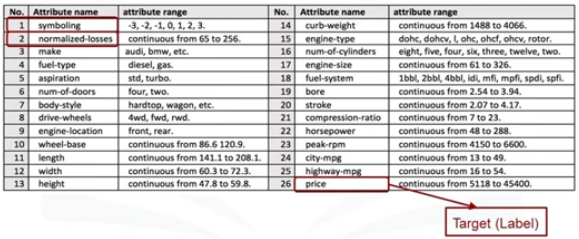

### Python packages

A Python library is a collection of functions and methods that allow you to perform lots of actions without writing any code.
The libraries usually contain built-in modules providing different functionalities, which you can use directly.
And there are extensive libraries, offering a broad range of facilities.

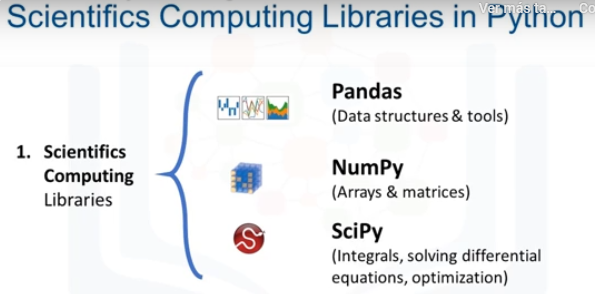

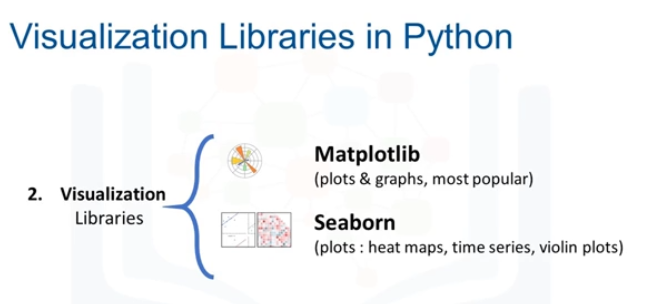

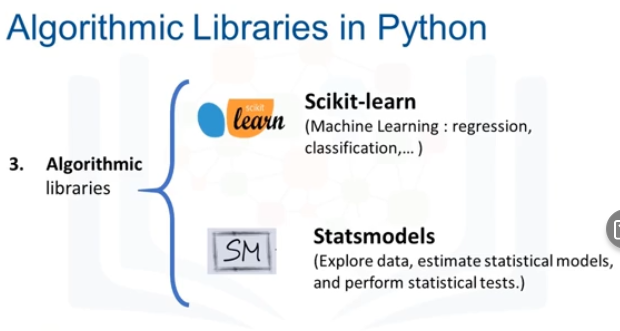

### importing and exporting data

Format and file path.
read_csv()
df
df.head(n)
df.tail(n)

Add headers
df.columns = headers
headers = ["a","b","c"]

export df to csv:
df.to_csv(path)

csv, json, excel, sql

### Analyzing data

Check data type
data distribution

object, float, int y datatime

- potential info and type mismatch
- compatibility with python methods

dataframe.dtypes

df.describe(include="all") -> count, mean, std deviation, min, 25%, 50%, 75%, max
all -> UNIQUE, top, freq

df.info()




### Data lab

<ul>
    <li>Data source: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>Data type: csv</li>
</ul>



In [10]:
#install specific version of libraries used in  lab
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install tqdm

SyntaxError: invalid syntax (336557738.py, line 1)

In [11]:
# import pandas library
import pandas as pd
import numpy as np

In [12]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

ModuleNotFoundError: No module named 'pyodide'

<h2>Read Data</h2>
<p>
We use <code>pandas.read_csv()</code> function to read the csv file. In the brackets, we put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.<br>

Because the data does not include headers, we can add an argument <code>headers = None</code> inside the <code>read_csv()</code> method so that pandas will not automatically set the first row as a header.<br>

You can also assign the dataset to any variable you create.

</p>

In [ ]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [ ]:
#you will need to download the dataset; if you are running locally, please comment out the following 
await download(path, "auto.csv")
path="auto.csv"

This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


# Import pandas library
import pandas as pd

# Read the online file by the URL provides above, and assign it to variable "df"

df = pd.read_csv(path, header=None)

After reading the dataset, we can use the <code>dataframe.head(n)</code> method to check the top n rows of the dataframe, where n is an integer. Contrary to <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> will show you the bottom n rows of the dataframe.


In [ ]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

In [ ]:
print("The last 10 rows of the dataframe\n")
df.tail(10)

In [ ]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

In [ ]:
df.columns = headers
df.head(10)

In [ ]:
df1=df.replace('?',np.NaN)


In [ ]:
df=df1.dropna(subset=["price"], axis=0)
df.head(20)

In [ ]:
print(df.columns)

<h2>Save Dataset</h2>
<p>
Correspondingly, Pandas enables us to save the dataset to csv. By using the <code>dataframe.to_csv()</code> method, you can add the file path and name along with quotation marks in the brackets.
</p>
<p>
For example, if you would save the dataframe <b>df</b> as <b>automobile.csv</b> to your local machine, you may use the syntax below, where <code>index = False</code> means the row names will not be written.
</p>

In [ ]:
df.to_csv("automobile.csv", index=False)

<h2>Read/Save Other Data Formats</h2>

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |


In [ ]:
df.dtypes

In [ ]:
# check the data type of data frame "df" by .dtypes
print(df.dtypes)

In [ ]:
dataframe.describe()

In [ ]:
df.describe()

In [ ]:
# describe all the columns in "df" 
df.describe(include = "all")

In [ ]:
df[['length', 'compression-ratio']].describe()

In [ ]:
dataframe.info()

In [ ]:
# look at the info of "df"
df.info()

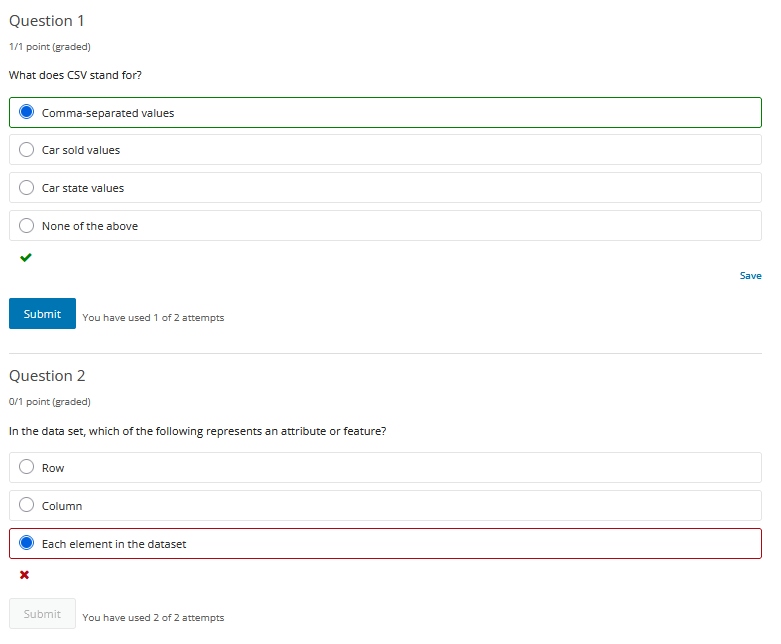


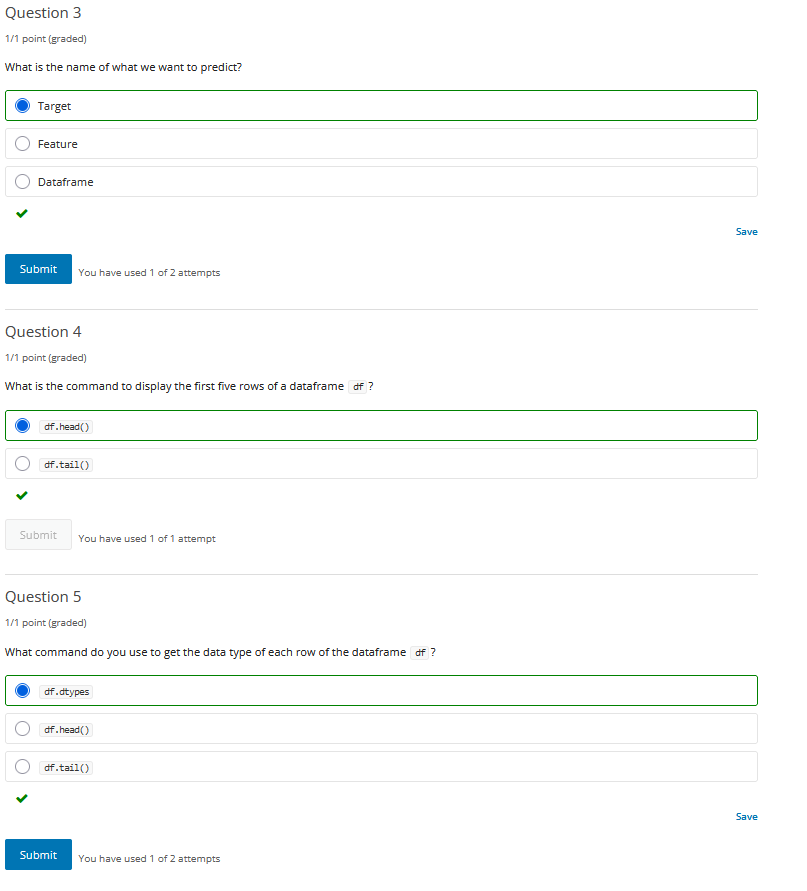

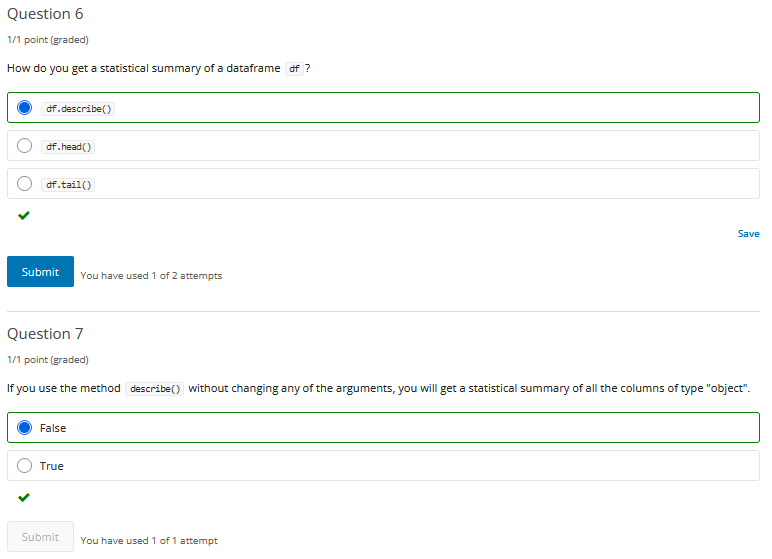